##### task2: clustering tasks

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/kick.csv",na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41409 entries, 0 to 41408
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   VehOdo                             41409 non-null  int64 
 1   MMRAcquisitionAuctionAveragePrice  41409 non-null  int64 
 2   Make                               41409 non-null  object
 3   WarrantyCost                       41409 non-null  int64 
 4   IsBadBuy                           41409 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ MB


In [ ]:
#pre-processing 
#task 2.1.a.

#kick_df = df[df['IsBadBuy'] == 1]

In [4]:
#kick_df

In [5]:
df.columns

Index(['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'Make', 'WarrantyCost',
       'IsBadBuy'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler

#exlude Make
df2 = df[['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost']].copy()

# convert df2 to matrix
X = df2.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans

random_state = 42

In [8]:
def inspect_clusters(df, cols, clusters_to_inspect):
    # prepare the column and bin size.
    n_bins = 20  
    for cluster in clusters_to_inspect:
        print("Distribution for cluster {}".format(cluster))
        
        # create subplots
        fig, ax = plt.subplots(nrows=len(cols))
        ax[0].set_title("Cluster {}".format(cluster))
        
        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(df[col]), max(df[col]), 20)
            
            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col], bins=bins, 
                         ax=ax[j], kde=True, stat="density")
            
            # plot the normal distribution with a black line
            sns.kdeplot(data=df[col], ax=ax[j], color="k")
                     
        plt.tight_layout()
        plt.show()

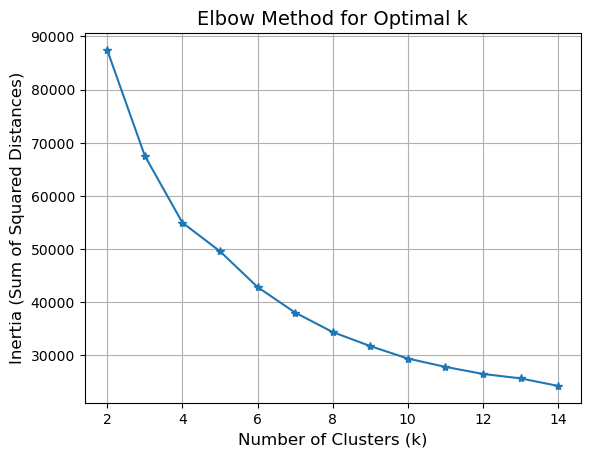

In [12]:
#task 2.2.c

#apply elbow method

# list to save the clusters and cost
clusters = []
inertia_vals = []

#choosing the search range for clusters
for k in range(2, 15, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia (Sum of Squared Distances)", fontsize=12)
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.grid(True)
    
# plot the inertia vs K values
plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.show()

In [13]:
#apply silhouette score

from sklearn.metrics import silhouette_score

for k in [4, 5, 6]:
    model = KMeans(n_clusters=k, random_state=random_state)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette score for k={k}: {score:.3f}")

Silhouette score for k=4: 0.285
Silhouette score for k=5: 0.251
Silhouette score for k=6: 0.268


Sum of intra-cluster distance: 54990.34757212605
Centroid locations:
[ 0.77919292 -0.38235638  1.6300036 ]
[-1.23726196  0.0313669  -0.67533575]
[ 0.41393793 -0.76158578 -0.26349205]
[0.38468206 1.09557688 0.10779152]
Cluster membership
Cluster_ID
2    12888
1    11570
3    10782
0     6169
Name: count, dtype: int64


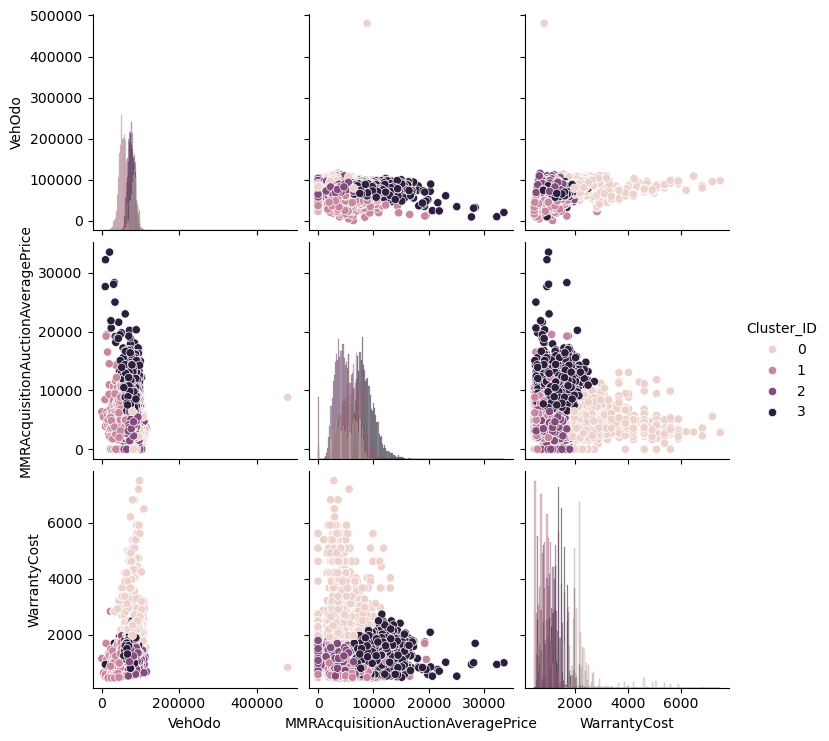

In [15]:
#pairplot with optimal k value

# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=random_state)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

In [72]:
#create cluster distribution plots

def inspect_clusters(df, cols, clusters_to_inspect):
    # prepare the column and bin size.
    n_bins = 20  
    for cluster in clusters_to_inspect:
        print("Distribution for cluster {}".format(cluster))
        
        # create subplots
        fig, ax = plt.subplots(nrows=3)
        ax[0].set_title("Cluster {}".format(cluster))
        
        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(df[col]), max(df[col]), 20)
            
            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col], bins=bins, 
                         ax=ax[j], kde=True, stat="density")
            
            # plot the normal distribution with a black line
            sns.kdeplot(data=df[col], ax=ax[j], color="k")
                     
        plt.tight_layout()
        plt.show()

Distribution for cluster 0


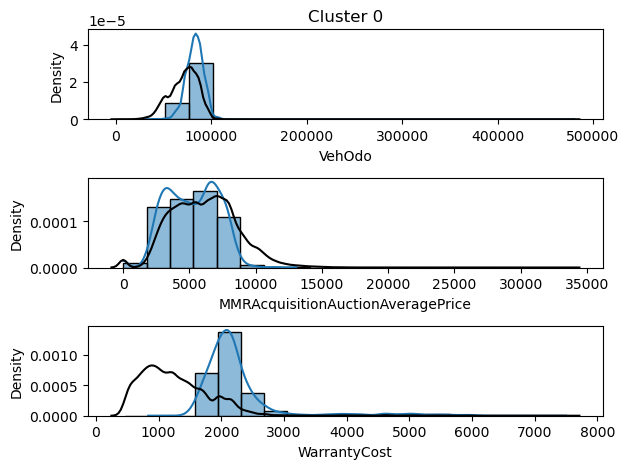

Distribution for cluster 1


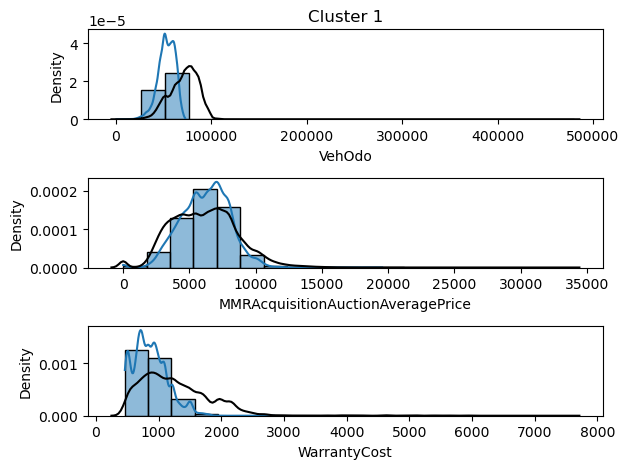

Distribution for cluster 2


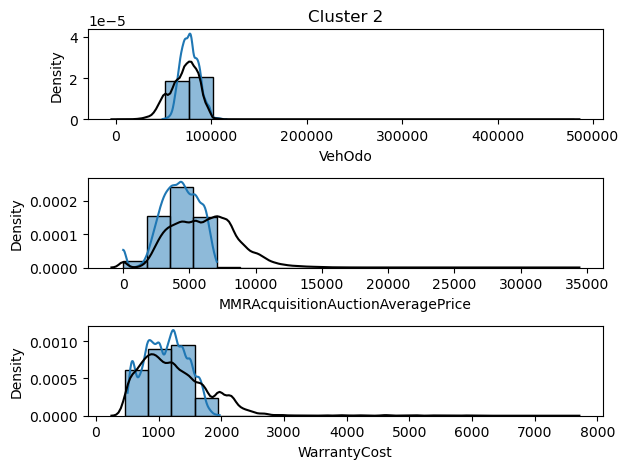

Distribution for cluster 3


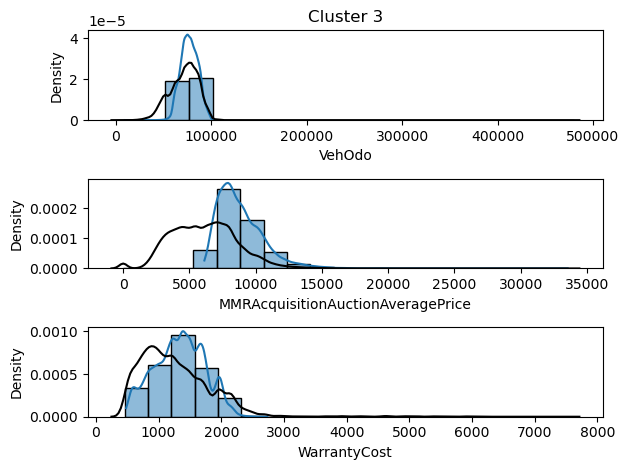

In [16]:
# columns to inspect
cols = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost']

# inspect all clusters
inspect_clusters(df2, cols, clusters_to_inspect=[0, 1, 2, 3])

In [18]:
#task 2.4.

#pre-processing

from sklearn.preprocessing import LabelEncoder

# convert string labels to numerical
le = LabelEncoder()
kmodes_df = df[['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost', 'Make']].copy()

kmodes_df['Make'] = le.fit_transform(df['Make'].values)

# convert df to matrix
X = kmodes_df.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

#train KModes model

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# train clustering with the specified K
model = KPrototypes(n_clusters=4, random_state=random_state, n_jobs=-1)
model.fit_predict(X, categorical=[1])

array([2, 2, 2, ..., 3, 3, 1], dtype=uint16)

Cluster membership
Cluster_ID
0    15754
2    11280
1     8030
3     6345
Name: count, dtype: int64


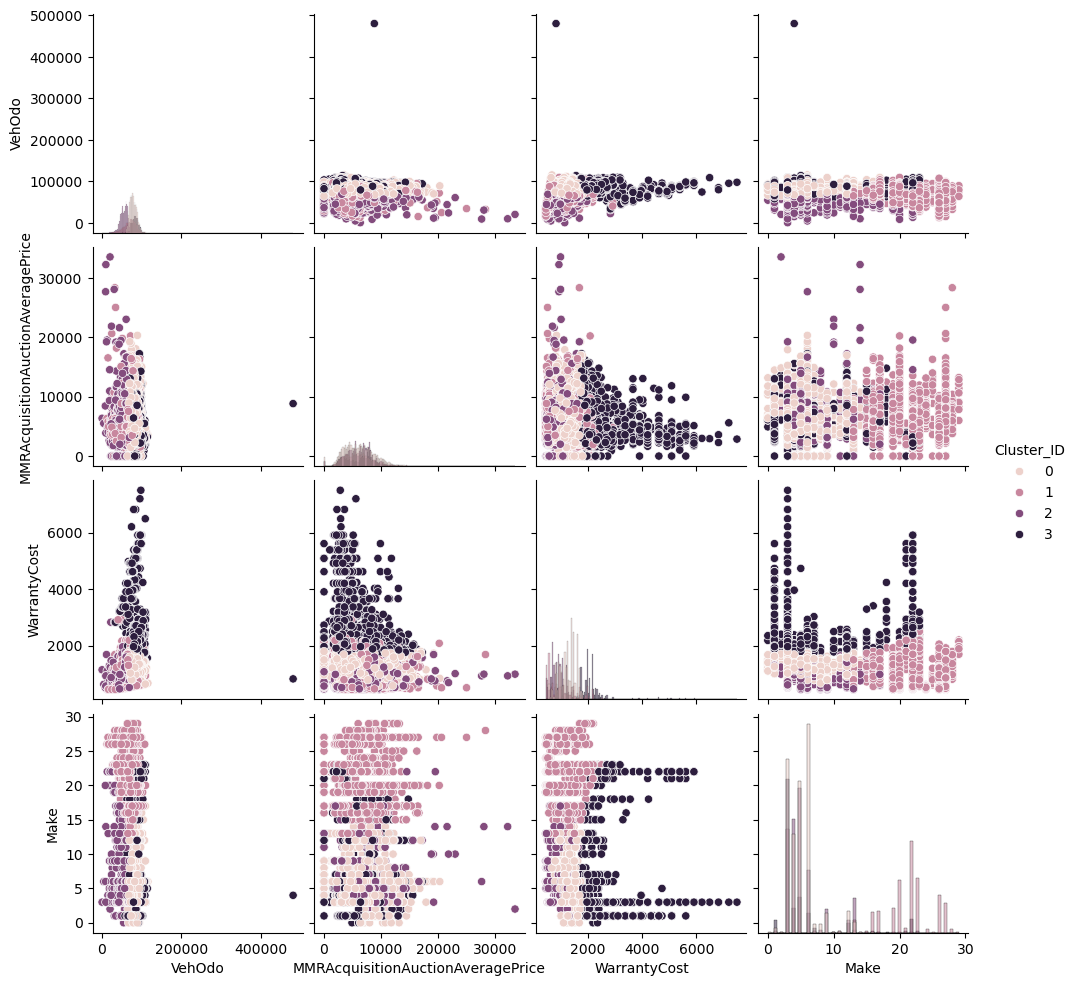

In [19]:
#visualisation for kmodes model

#pairplot

y = model.fit_predict(X, categorical=[1])
kmodes_df['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(kmodes_df['Cluster_ID'].value_counts())

# pairplot the cluster distribution
cluster_g = sns.pairplot(kmodes_df, hue='Cluster_ID', diag_kind='hist')
plt.show()

Distribution for cluster 0


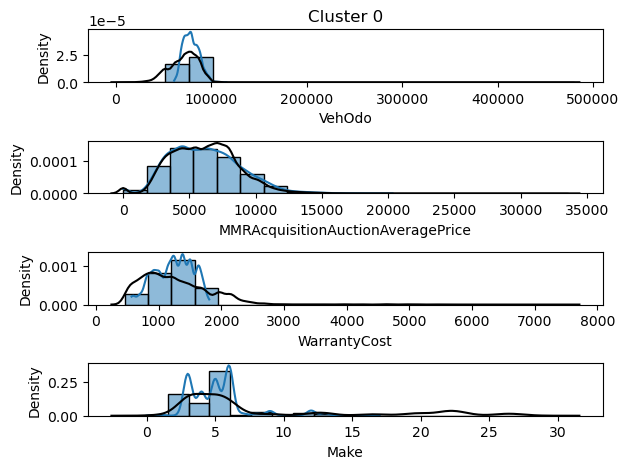

Distribution for cluster 1


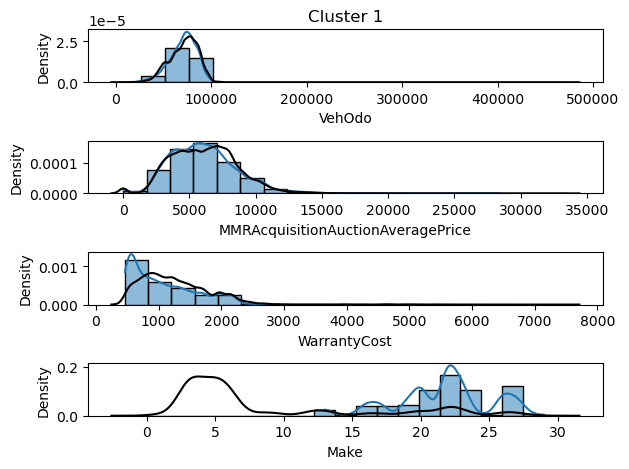

Distribution for cluster 2


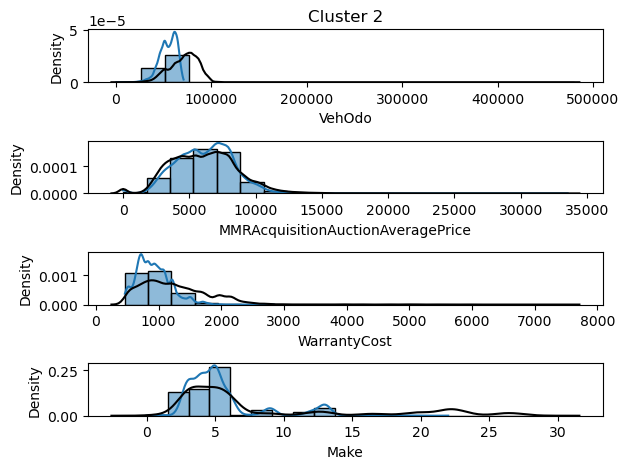

Distribution for cluster 3


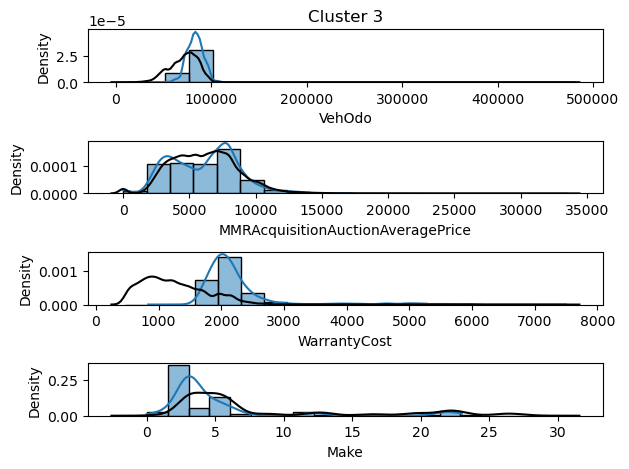

In [20]:
# examine clusters

cols = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost','Make']
inspect_clusters(kmodes_df, cols, [0, 1, 2, 3])


In [21]:
df2

,VehOdo,MMRAcquisitionAuctionAveragePrice,WarrantyCost,Cluster_ID
0,51099,8566,920,1
1,48542,8566,834,1
2,46318,8835,834,1
3,50413,7165,671,1
4,50199,8566,920,1
...,...,...,...,...
41404,45234,1996,993,1
41405,71759,6418,1038,2
41406,88500,8545,1893,3
41407,79554,6420,1974,0
